In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\abhis\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\abhis\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\abhis\Downloads\Transactions.csv")

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

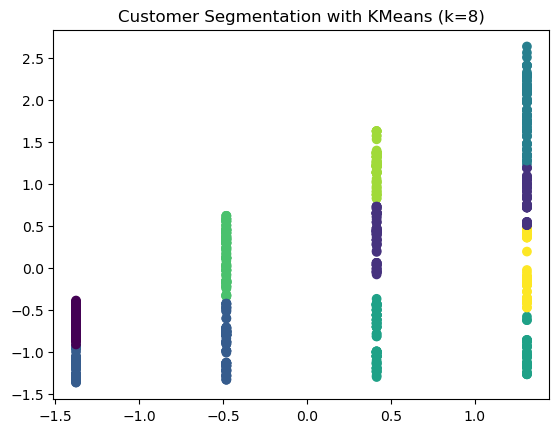

Number of clusters: 8
Davies-Bouldin Index: 0.7270574365948115
Silhouette Score: 0.48772709320571755


In [56]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns

# Drop non-numeric columns
data = data.drop(columns=non_numeric_cols)

# Data preprocessing
data = data.fillna(0)  # Handle missing values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(scaled_data, labels)
    silhouette_avg = silhouette_score(scaled_data, labels)
    scores.append((k, db_index, silhouette_avg))

# Choose the best number of clusters based on DB Index or Silhouette Score
best_k = min(scores, key=lambda x: x[1])[0]  # Using DB Index here

# Final clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(scaled_data)
data['cluster'] = kmeans.labels_

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_data, data['cluster'])
silhouette_avg = silhouette_score(scaled_data, data['cluster'])

# Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=data['cluster'], cmap='viridis')
plt.title(f'Customer Segmentation with KMeans (k={best_k})')
plt.show()

# Report
print(f'Number of clusters: {best_k}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')